In [1]:
from game import *

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
from RL_helper import symbol_action_map

In [3]:
game_settings = BIG_tool_use_advanced_2_5
game_settings.gameSize = 224 # for compatibility with brain's expected size
G = discreteGame(game_settings) # kind of a waste; will only call this object to generate random versions of itself

In [4]:
G2 = discreteGame(G.random_bare_settings(gameSize=224, max_agent_offset=0.5))

In [5]:
import matplotlib.pyplot as plt

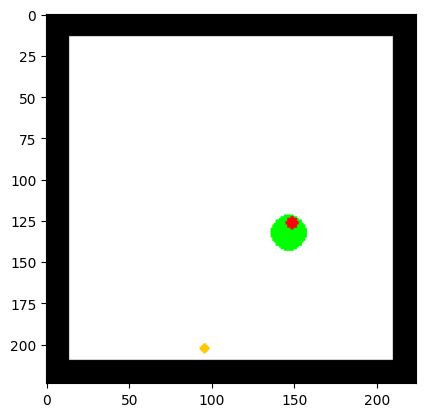

In [6]:
plt.imshow(G2.getData())

In [7]:
from RL_helper import *

In [8]:
from visual_transformer import *
device = torch.device('cuda:0')

In [9]:
def quick_display(torch_img):
    clean = torch_img.detach().cpu()
    right_order = torch.permute(clean, (1, 2, 0))
    array = right_order.numpy()
    plt.imshow(array)

In [10]:
symbol_action_map = {1: 1, 2: 2, 3: 3, 4: 4}
symbol_action_map

{1: 1, 2: 2, 3: 3, 4: 4}

In [11]:
from RL_logic_solver import * # convenient way to get fake, logical traces

In [17]:
def get_bb(num_buffers=64, batch_size=1, start_with_guide=True):
    bb = []
    brain.eval()
    for i in range(num_buffers):
        print(i)
        # In this case, we are only training the 'dopamine' layer on the val training loop
        buff = GameOutputBuffer(brain, brain.evaluate_text, gamma=0.99, tau=0.97, default_batch_size=batch_size)
        if start_with_guide and (i == 0):
            fake_data_fill(buff, G, batch_size, device=device) # This one guide is the only difference between this and the main one.
        else:
            buff.fill(G, num_games=batch_size)
            buff.cpu()
        bb.append(buff)
        #print(buff.traces)
    return bb

In [18]:
brain = DefaultAgentBrain().to(device) # this is for fake_traces; for others, include the output size of only 5

In [19]:
brain.load_state_dict(torch.load('brain_checkpoints/brain_weights_RL_fake_traces_v1_batch6200.pth', weights_only=True, map_location=device))

<All keys matched successfully>

In [20]:
brain.eval()
bb = get_bb()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


In [36]:
def average_return(bb):
    """The average return (at the end of the seeds alone) from a buffer-buffer"""
    s = torch.zeros(bb[0].returns[:, 0].size(), device = bb[0].returns[:, 0].device)
    for b in bb:
        s += b.returns[:, 0]
    return torch.sum(s).item()/(len(bb) * bb[0].returns.size()[0])

In [37]:
average_return(bb)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [38]:
bb[16].traces

tensor([[   0, 2050,  582,  378,  424,  470,  347,   17,   17,   17,  723, 1599,
          786,   18,   16,  329,  300,  395, 2386,  326, 9704, 2590,  298,   18,
          300,  466,  317,   18, 2488,   18,    2]])

In [39]:
bb[16].rewards

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.]])

In [40]:
bb[16].returns

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.]])

In [41]:
# Great, so really, nothing was learned

In [42]:
# In the future, this notebook will include more code, to display the game from settings, walk through execution, etc.
# Right now, however, there is no need. Not interesting.